In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#reading in test/training dataset
train_df = pd.read_csv('train_dataqA.csv')
test_df = pd.read_csv('test_dataqA.csv')

In [2]:
train_df.shape

(669, 21)

In [3]:
test_df.shape

(167, 21)

In [4]:
train_df.columns

Index(['Unnamed: 0', 'Age', 'Anonymity_protection', 'Company_size',
       'Coworkers_comfortable_talking',
       'Discouranged_in_revealing_MHD_at_work', 'Family_history_MHD', 'Gender',
       'Have_MHD', 'Is_tech', 'MHD_identification_effect_on_career',
       'MHD_identification_team_reaction', 'Medical_leave_MH',
       'MentalH_company_info', 'MentalH_company_resources',
       'MentalH_insurance', 'Past_MHD', 'Superviser_comfortable_talking',
       'Treatment_sought', 'Work_interference_with_Treatment',
       'Work_interference_without_Treatment'],
      dtype='object')

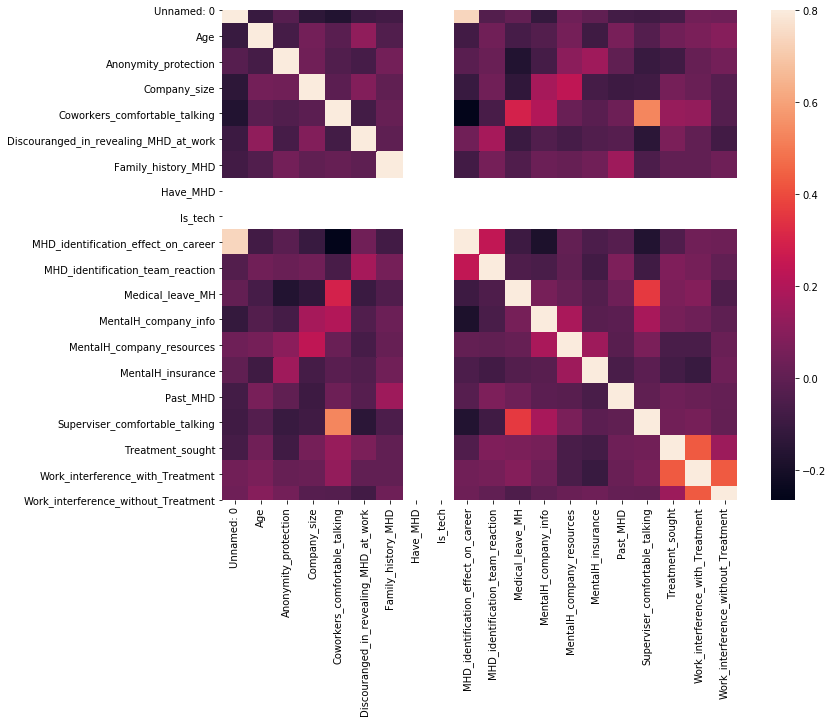

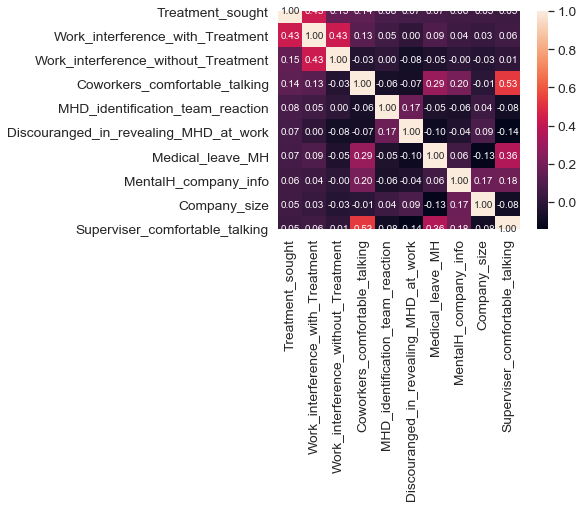

In [5]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Treatment_sought')['Treatment_sought'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

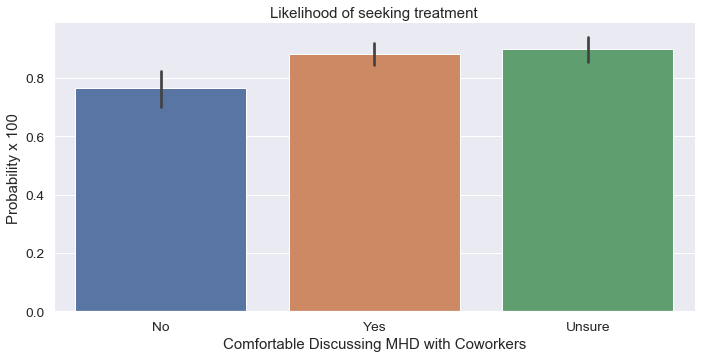

In [6]:
g = sns.catplot(x="Coworkers_comfortable_talking", y="Treatment_sought", data=train_df, kind="bar", ci=95, height=5, aspect=2, legend_out = True)
plt.title('Likelihood of seeking treatment')
plt.ylabel('Probability x 100')
plt.xlabel('Comfortable Discussing MHD with Coworkers')
g.set_xticklabels(['No', 'Yes', 'Unsure']);
# those who said yes were more likely to seek treatment

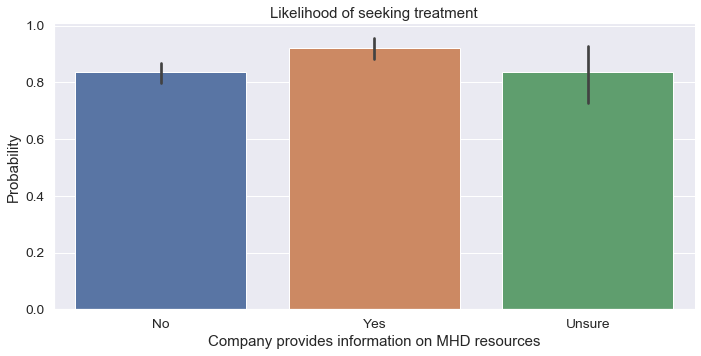

In [7]:
no_na2 = train_df[train_df['MentalH_company_info'] != -1]
g = sns.catplot(x="MentalH_company_info", y="Treatment_sought", data=no_na2, kind="bar", ci = 95, height=5, aspect=2, legend_out = True)
plt.title('Likelihood of seeking treatment')
plt.ylabel('Probability')
plt.xlabel('Company provides information on MHD resources')
g.set_xticklabels(['No', 'Yes', 'Unsure']);

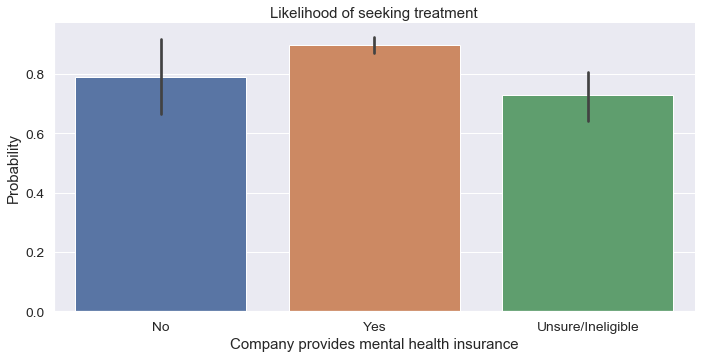

In [8]:
no_na3 = train_df[train_df['MentalH_insurance'] != 3]
g = sns.catplot(x="MentalH_insurance", y="Treatment_sought", data=no_na3, kind="bar", ci = 95, height=5, aspect=2, legend_out = True)
plt.title('Likelihood of seeking treatment')
plt.ylabel('Probability')
plt.xlabel('Company provides mental health insurance')
g.set_xticklabels(['No', 'Yes', 'Unsure/Ineligible']);

In [11]:
feature_cols = ['Age', 'Anonymity_protection', 'Company_size',
       'Coworkers_comfortable_talking',
       'Discouranged_in_revealing_MHD_at_work', 'Family_history_MHD', 'MHD_identification_effect_on_career',
       'MHD_identification_team_reaction', 'Medical_leave_MH',
       'MentalH_company_info', 'MentalH_company_resources',
       'MentalH_insurance', 'Past_MHD', 'Superviser_comfortable_talking']
X_train = train_df[feature_cols]
y_train = train_df['Treatment_sought']
X_test = test_df[feature_cols]
y_test = test_df['Treatment_sought']

Feature ranking:
1. feature 0 (0.111274)
2. feature 7 (0.092562)
3. feature 8 (0.090243)
4. feature 2 (0.085296)
5. feature 11 (0.073144)
6. feature 5 (0.072376)
7. feature 6 (0.067924)
8. feature 3 (0.065872)
9. feature 4 (0.064876)
10. feature 12 (0.064364)
11. feature 13 (0.063121)
12. feature 10 (0.061084)
13. feature 1 (0.046331)
14. feature 9 (0.041533)


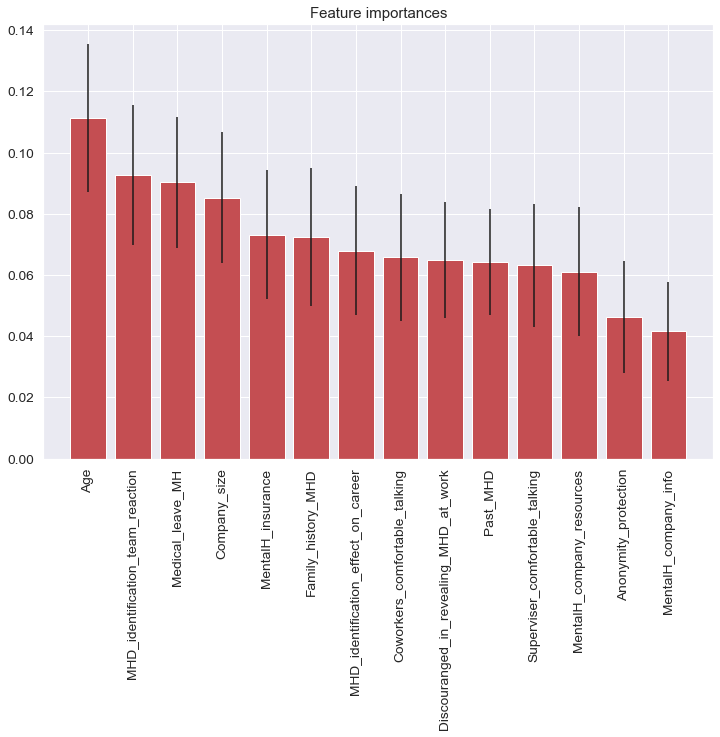

In [18]:
X = train_df[feature_cols]
y = train_df['Treatment_sought']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

labels = []
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    labels.append(feature_cols[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [12]:
forest.score(X_test, y_test)

0.844311377245509

In [14]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
    
log_ypred = logreg.predict(X_test)
    
log_score = logreg.score(X_test, y_test)
log_confmat = confusion_matrix(y_test, log_ypred)
log_f1 = f1_score(y_test, log_ypred)

print('*LOGISTIC REGRESSION*')
print('Accuracy:', log_score)
print('F1:', log_f1)
print(log_confmat)

*LOGISTIC REGRESSION*
Accuracy: 0.8502994011976048
F1: 0.9190938511326862
[[  0  25]
 [  0 142]]


C:\Users\sherr\Anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
# KNN with different number of neighbors
knn_train_scores = []
for i in range(3, len(feature_cols), 2):
    knn_tune = KNeighborsClassifier(n_neighbors = i)
    knn_tune.fit(X_train, y_train)
    one_score = cross_val_score(knn_tune, X_train, y_train, cv = 10, scoring = 'accuracy')
    knn_train_scores.append(np.average(one_score))
print('*KNN*')
print('Best NN:', np.argmax(knn_train_scores) + 3)
print('Accuracy on Training Set:', knn_train_scores[np.argmax(knn_train_scores)])
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_ypred = knn.predict(X_test)
knn_confmat = confusion_matrix(y_test, knn_ypred)
knn_f1 = f1_score(y_test, knn_ypred)
print('Accuracy on Test Set:', knn.score(X_test, y_test))
print('F1:', knn_f1)
print(knn_confmat)

*KNN*
Best NN: 7
Accuracy on Training Set: 0.8580692792720888
Accuracy on Test Set: 0.8502994011976048
F1: 0.9185667752442996
[[  1  24]
 [  1 141]]


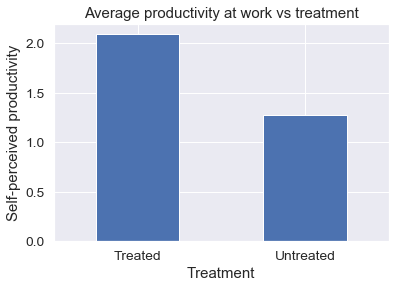

In [35]:
train_df[['Work_interference_with_Treatment',
       'Work_interference_without_Treatment']].mean().plot(kind = 'bar')
plt.title('Average productivity at work vs treatment')
plt.ylabel('Self-perceived productivity')
plt.xlabel('Treatment')
plt.xticks([0, 1], labels = ['Treated', 'Untreated'], rotation=0);

In [40]:
train_df['Work_interference_with_Treatment'].value_counts()

 2    256
 3    241
-1     76
 4     48
 1     48
Name: Work_interference_with_Treatment, dtype: int64

In [53]:
train_df['Work_interference_without_Treatment'].value_counts()

 1    411
 2    185
-1     37
 3     32
 4      4
Name: Work_interference_without_Treatment, dtype: int64

In [68]:
interference = pd.DataFrame({'Frequency': ['Sometimes', 'Rarely', 'NotApp', 'Often', 'Never'],
                             'With Treatment': list(train_df['Work_interference_with_Treatment'].value_counts(normalize = True)),
                            'Without Treatment': list(train_df['Work_interference_without_Treatment'].value_counts(normalize = True))})
interference = interference[interference['Frequency'] != 'NotApp']
interference = interference.reindex([3, 0, 1, 4])
interference

,Frequency,With Treatment,Without Treatment
3,Often,0.071749,0.047833
0,Sometimes,0.382661,0.614350
1,Rarely,0.360239,0.276532
4,Never,0.071749,0.005979


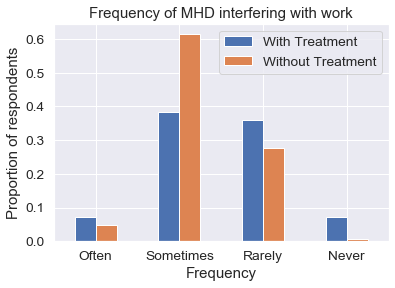

In [72]:
interference.plot(x = 'Frequency', kind = 'bar')
plt.title('Frequency of MHD interfering with work')
plt.ylabel('Proportion of respondents')
plt.xticks(rotation=0);